In [400]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import binarize


%matplotlib inline
pd.set_option('max.columns', 100)

In [401]:
df = pd.read_csv('/Users/ling/Desktop/ds_class/DS-SF-42/final_project/kag_risk_factors_cervical_cancer.csv')

## 1.Load in dataset and clean up data

In [402]:
df.shape
df.info()
df.head()
df.to_csv('/Users/ling/desktop/project_data_raw.csv')

#rename columns

df.columns = [['age', 'sexual_partners', 'first_sexual_intercourse', 'num_pregnancies', 'smokes', 'smoke_years',
              'smoke_packs_per_year', 'hormonal_contraceptives', 'hormonal_contraceptive_years', 'iud', 'iud_years',
               'stds', 'stds_number', 'std_condylomatosis', 'std_cervical_condylomatosis', 
               'std_vaginal_condylomatosis', 'std_vulvo_condylomatosis', 'std_syphilis', 'std_pelvic_inflam', 
               'std_genital_herpes', 'std_molluscum_contagiosum', 'std_aids', 'std_hiv', 'std_hepatitisb', 'std_hpv',
               'std_num_diagnosis', 'std_time_since_first_diagnosis','std_time_since_last_diagnosis', 'dx_cancer', 
               'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'schiller', 'citology', 'biopsy']]

#rename ? to nan, convert objects to float


df = df.replace('?', np.nan)
df = df.convert_objects(convert_numeric=True)
df.info()
print df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [403]:
df.isnull().sum()

age                                 0
sexual_partners                    26
first_sexual_intercourse            7
num_pregnancies                    56
smokes                             13
smoke_years                        13
smoke_packs_per_year               13
hormonal_contraceptives           108
hormonal_contraceptive_years      108
iud                               117
iud_years                         117
stds                              105
stds_number                       105
std_condylomatosis                105
std_cervical_condylomatosis       105
std_vaginal_condylomatosis        105
std_vulvo_condylomatosis          105
std_syphilis                      105
std_pelvic_inflam                 105
std_genital_herpes                105
std_molluscum_contagiosum         105
std_aids                          105
std_hiv                           105
std_hepatitisb                    105
std_hpv                           105
std_num_diagnosis                   0
std_time_sin

In [404]:
#do all columns have values
df.sum(axis=0)

age                               23012.000000
sexual_partners                    2103.000000
first_sexual_intercourse          14463.000000
num_pregnancies                    1825.000000
smokes                              123.000000
smoke_years                        1030.664594
smoke_packs_per_year                382.906638
hormonal_contraceptives             481.000000
hormonal_contraceptive_years       1692.314401
iud                                  83.000000
iud_years                           381.470000
stds                                 79.000000
stds_number                         133.000000
std_condylomatosis                   44.000000
std_cervical_condylomatosis           0.000000
std_vaginal_condylomatosis            4.000000
std_vulvo_condylomatosis             43.000000
std_syphilis                         18.000000
std_pelvic_inflam                     1.000000
std_genital_herpes                    1.000000
std_molluscum_contagiosum             1.000000
std_aids     

In [405]:
#count nans in each column
df.isnull().sum()

#drop column with a lot of nans, columns with no values at all 
df = df.drop(['std_time_since_first_diagnosis', 'std_time_since_last_diagnosis', 'std_aids', 
              'std_cervical_condylomatosis'], axis=1)

df.isnull().sum()
len(df)

858

[(0, 668), (1, 723), (2, 728), (3, 742), (4, 751), (5, 752), (6, 752), (7, 753), (8, 753), (9, 753), (10, 753), (11, 753), (12, 757), (13, 757), (14, 760), (15, 763), (16, 838), (17, 853), (18, 855), (19, 858)]


,age,sexual_partners,first_sexual_intercourse,num_pregnancies,smokes,smoke_years,smoke_packs_per_year,hormonal_contraceptives,hormonal_contraceptive_years,iud,iud_years,stds,stds_number,std_condylomatosis,std_vaginal_condylomatosis,std_vulvo_condylomatosis,std_syphilis,std_pelvic_inflam,std_genital_herpes,std_molluscum_contagiosum,std_hiv,std_hepatitisb,std_hpv,std_num_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


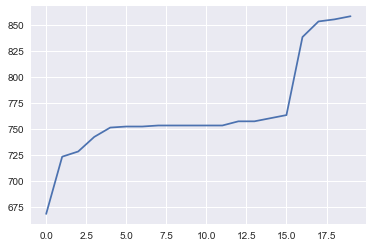

In [406]:
#drop rows with a lot of missing values
#decide to drop rows missing more than 3 values
count = []

missing_values = range(0,20)

for number in missing_values:
    count.append(858-len(df[df.isnull().sum(axis=1) > number]))

print zip(missing_values,count)
plt.plot(missing_values,count)

df = df[df.isnull().sum(axis=1) <= 3]
df.head()

In [407]:
#drop columns that are collinear? 

df = df.drop(['stds', 'stds_number'], axis=1)

df.isnull().sum()

age                              0
sexual_partners                 14
first_sexual_intercourse         6
num_pregnancies                 47
smokes                           8
smoke_years                      8
smoke_packs_per_year             8
hormonal_contraceptives          2
hormonal_contraceptive_years     2
iud                              6
iud_years                        6
std_condylomatosis               0
std_vaginal_condylomatosis       0
std_vulvo_condylomatosis         0
std_syphilis                     0
std_pelvic_inflam                0
std_genital_herpes               0
std_molluscum_contagiosum        0
std_hiv                          0
std_hepatitisb                   0
std_hpv                          0
std_num_diagnosis                0
dx_cancer                        0
dx_cin                           0
dx_hpv                           0
dx                               0
hinselmann                       0
schiller                         0
citology            

In [408]:
df.to_csv('/Users/ling/desktop/project_data2.csv')

In [409]:
#either drop columns with nan or replace with median/most common value 

#1. Option 1, drop columns with na value. this would get 668 results 
# df = df.dropna(how='any')

#2. Option 2, fill valuew with the median value. 

columns = df.columns

for col in columns:
    df = df
    df[col] = df[col].fillna(df[col].median())

print df.shape
df.isnull().sum()


(742, 30)


age                             0
sexual_partners                 0
first_sexual_intercourse        0
num_pregnancies                 0
smokes                          0
smoke_years                     0
smoke_packs_per_year            0
hormonal_contraceptives         0
hormonal_contraceptive_years    0
iud                             0
iud_years                       0
std_condylomatosis              0
std_vaginal_condylomatosis      0
std_vulvo_condylomatosis        0
std_syphilis                    0
std_pelvic_inflam               0
std_genital_herpes              0
std_molluscum_contagiosum       0
std_hiv                         0
std_hepatitisb                  0
std_hpv                         0
std_num_diagnosis               0
dx_cancer                       0
dx_cin                          0
dx_hpv                          0
dx                              0
hinselmann                      0
schiller                        0
citology                        0
biopsy        

In [410]:
df.to_csv('/Users/ling/desktop/project_data2.csv')

In [411]:
df.head(10)

,age,sexual_partners,first_sexual_intercourse,num_pregnancies,smokes,smoke_years,smoke_packs_per_year,hormonal_contraceptives,hormonal_contraceptive_years,iud,iud_years,std_condylomatosis,std_vaginal_condylomatosis,std_vulvo_condylomatosis,std_syphilis,std_pelvic_inflam,std_genital_herpes,std_molluscum_contagiosum,std_hiv,std_hepatitisb,std_hpv,std_num_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


## 2. EDA

In [412]:
df.describe()

,age,sexual_partners,first_sexual_intercourse,num_pregnancies,smokes,smoke_years,smoke_packs_per_year,hormonal_contraceptives,hormonal_contraceptive_years,iud,iud_years,std_condylomatosis,std_vaginal_condylomatosis,std_vulvo_condylomatosis,std_syphilis,std_pelvic_inflam,std_genital_herpes,std_molluscum_contagiosum,std_hiv,std_hepatitisb,std_hpv,std_num_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,27.254717,2.524259,17.105121,2.296496,0.141509,1.218145,0.457588,0.638814,2.207405,0.111860,0.514111,0.057951,0.005391,0.056604,0.021563,0.001348,0.001348,0.001348,0.021563,0.001348,0.002695,0.095687,0.024259,0.010782,0.022911,0.029650,0.047170,0.098383,0.055256,0.071429
std,8.721115,1.679062,2.838857,1.416488,0.348781,4.140580,2.297201,0.480668,3.630715,0.315407,1.941869,0.233809,0.073274,0.231240,0.145351,0.036711,0.036711,0.036711,0.145351,0.036711,0.051882,0.316454,0.153955,0.103343,0.149721,0.169733,0.212145,0.298032,0.228634,0.257713
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


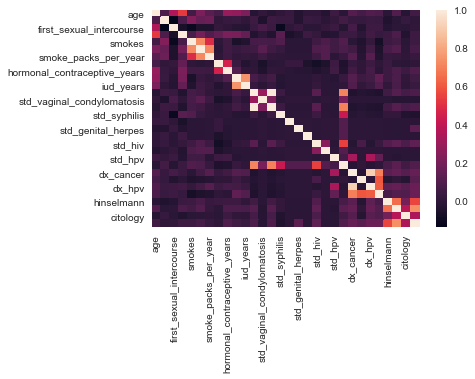

In [413]:
sns.heatmap(df.corr())
sns.set(rc={'figure.figsize':(40,40)})

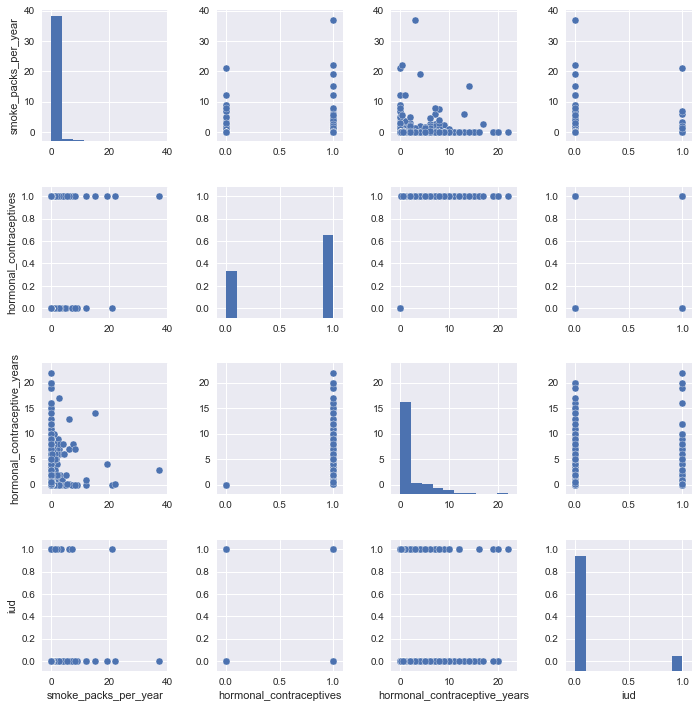

In [414]:
sns.pairplot(df.iloc[:, 6:10])

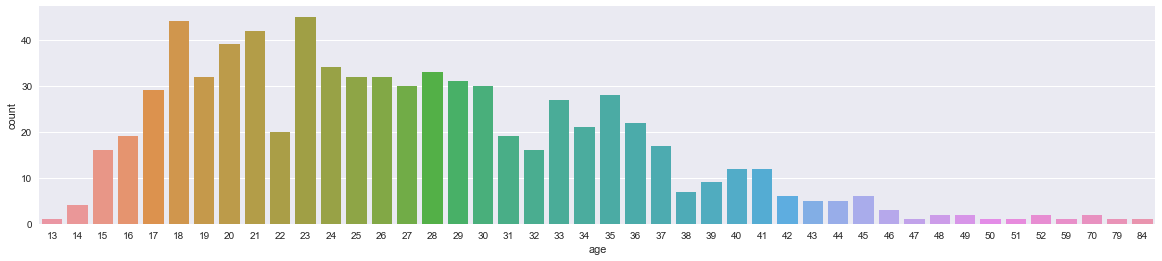

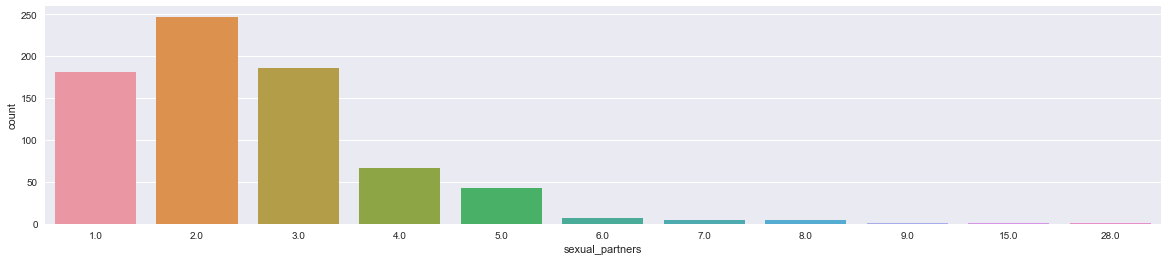

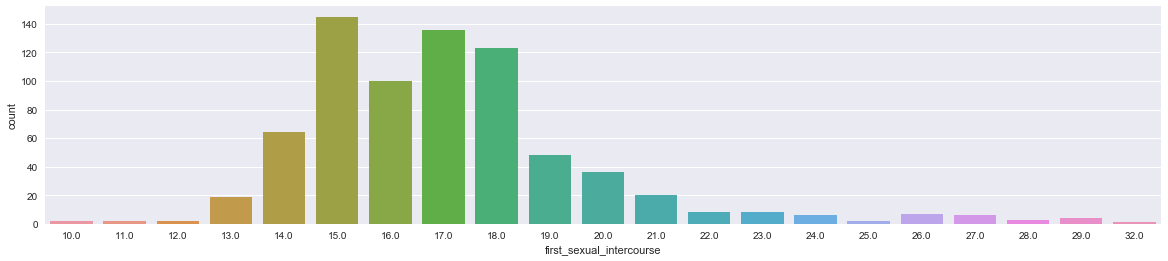

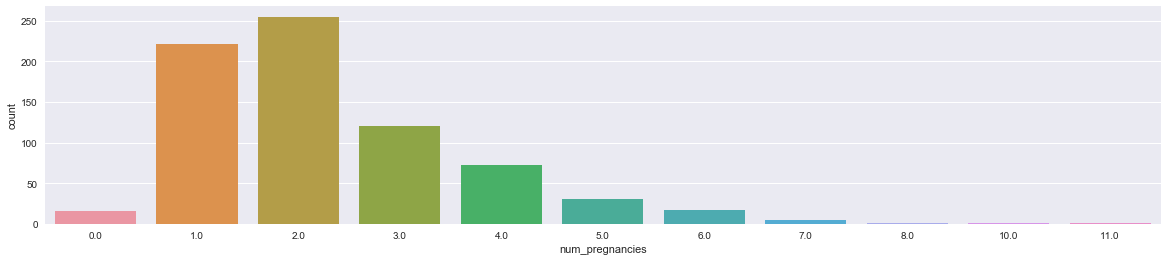

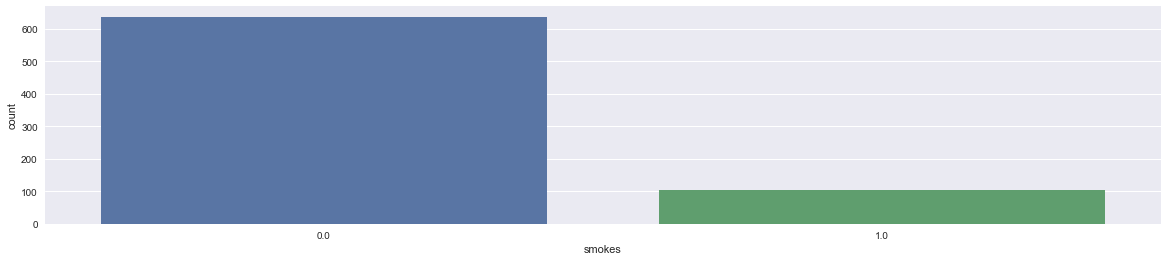

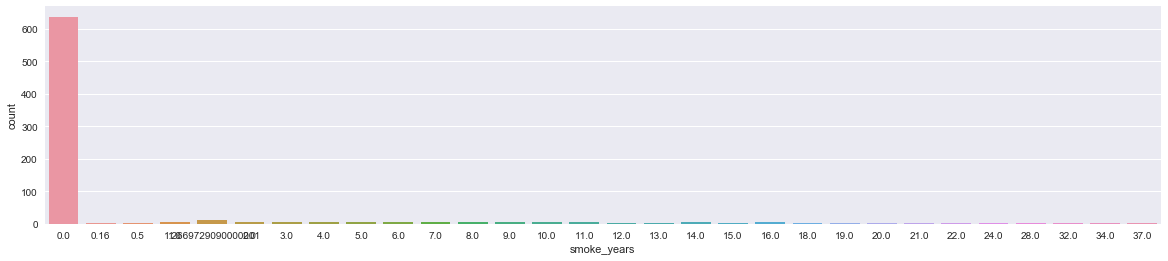

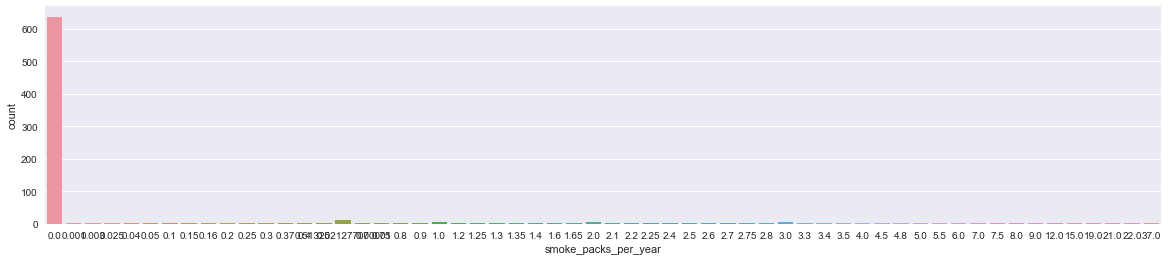

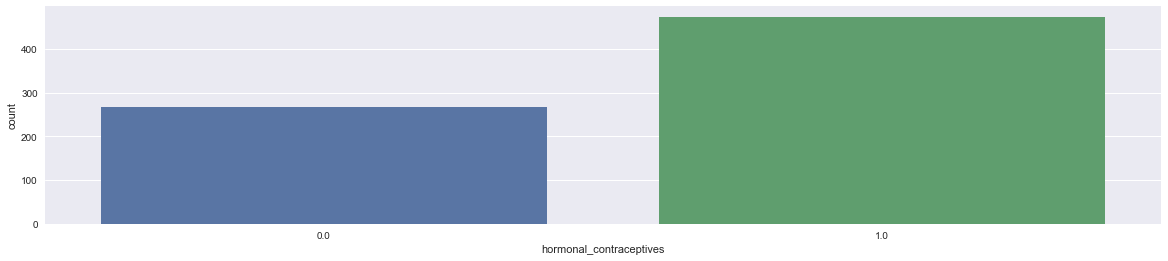

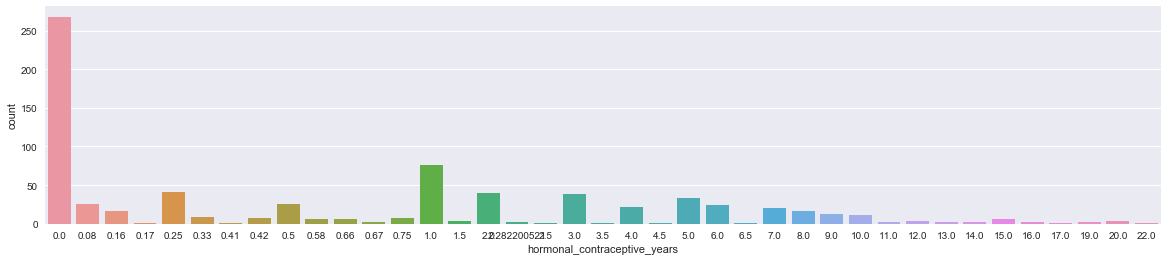

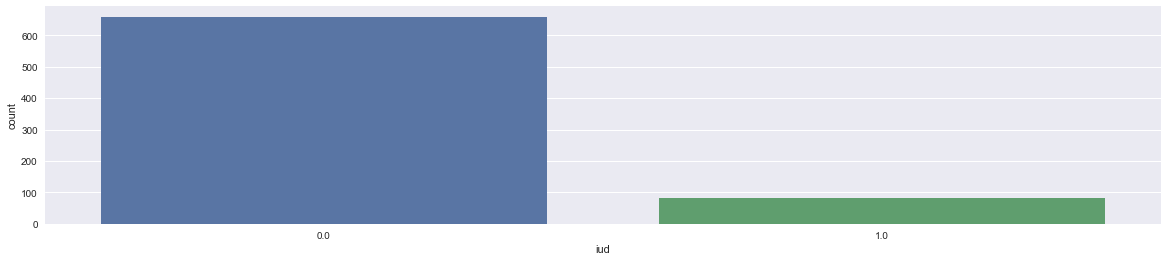

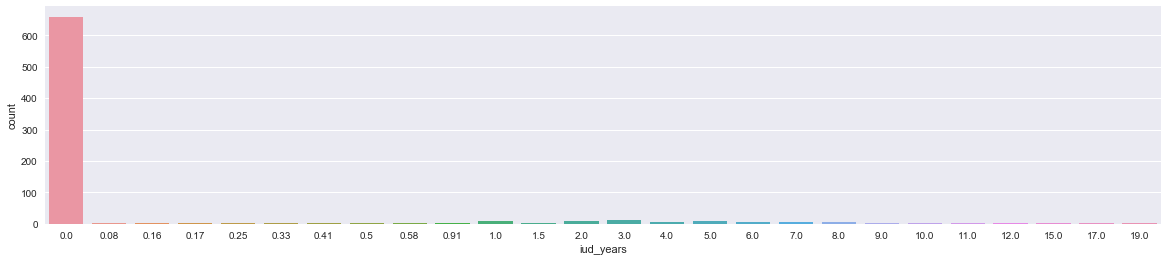

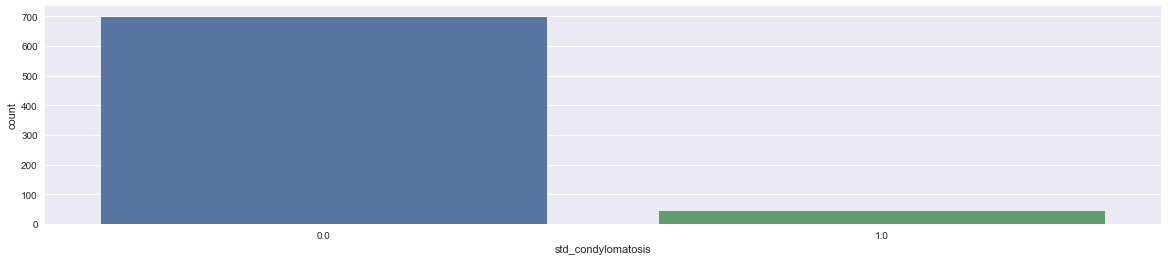

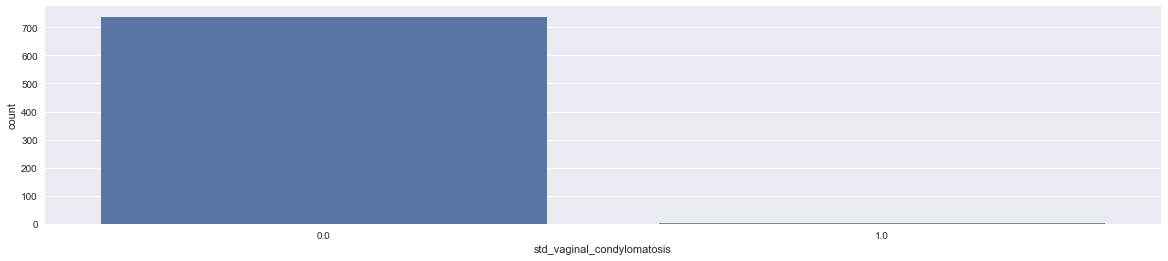

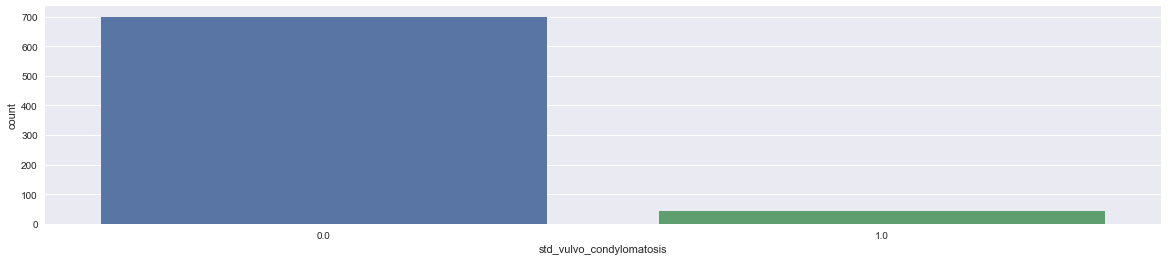

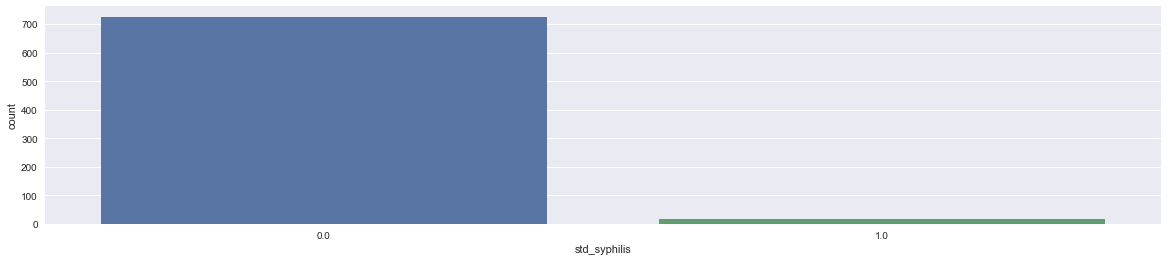

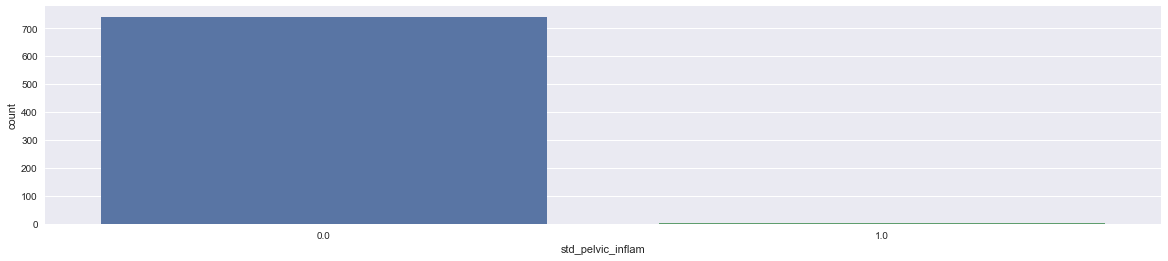

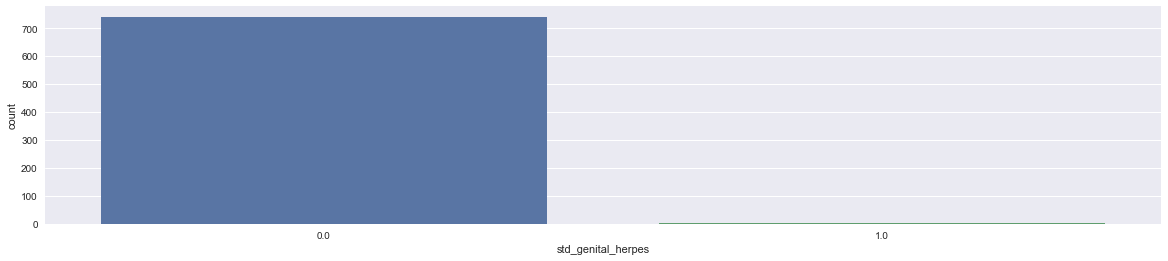

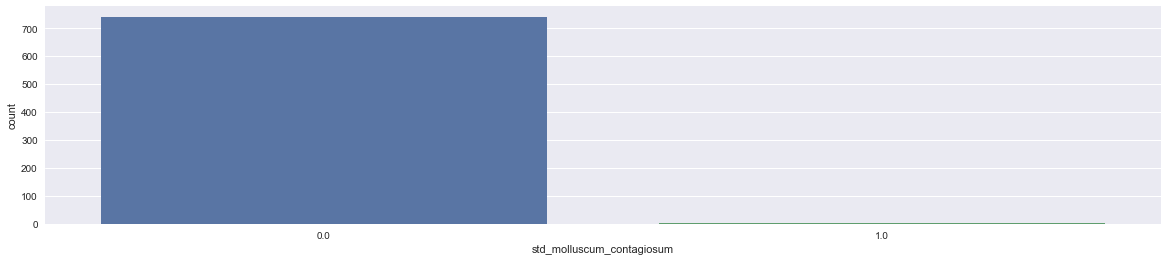

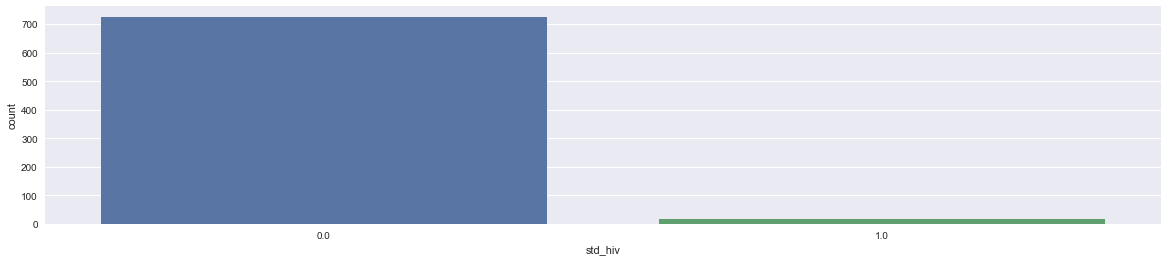

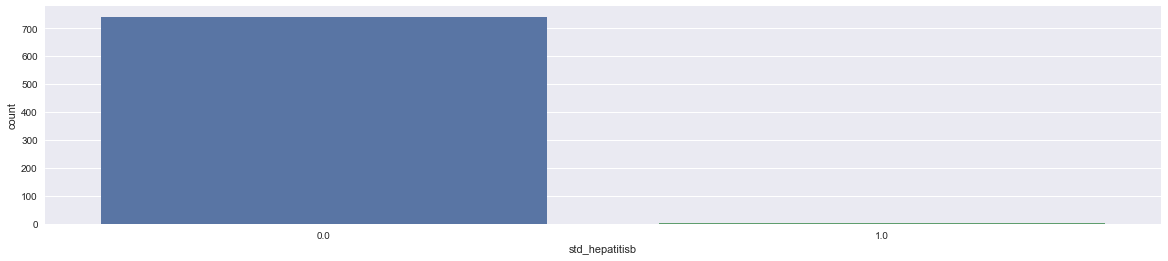

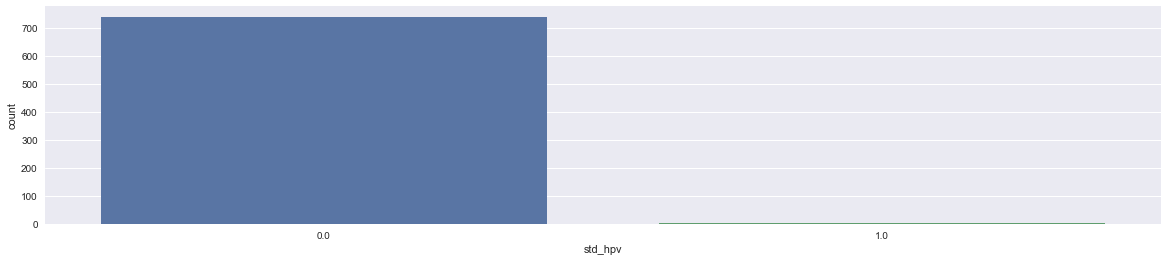

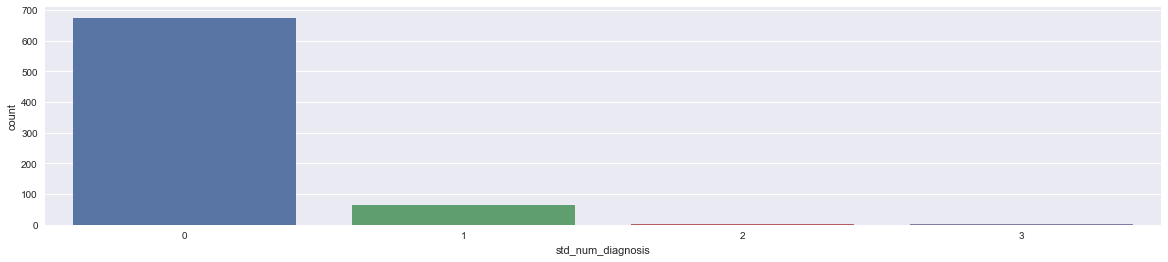

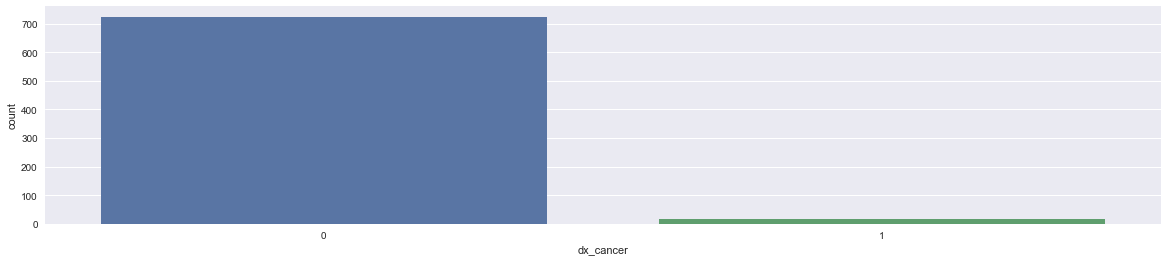

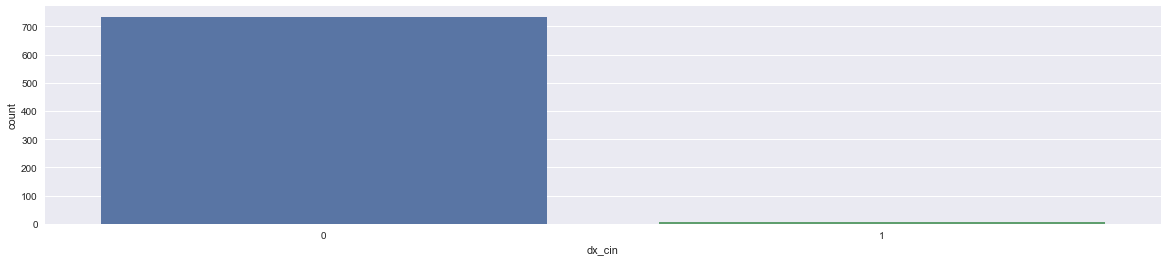

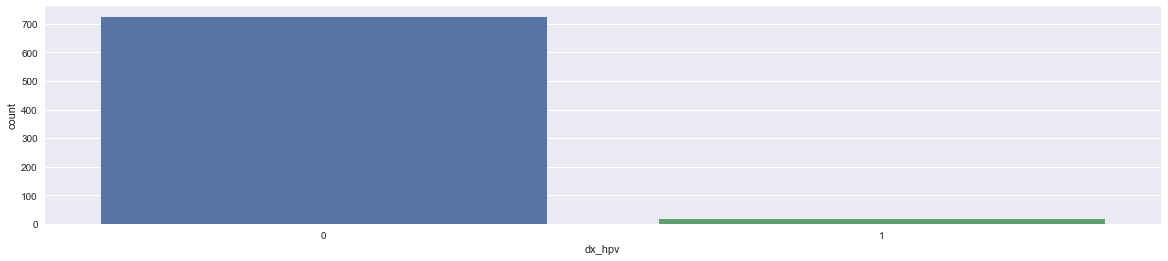

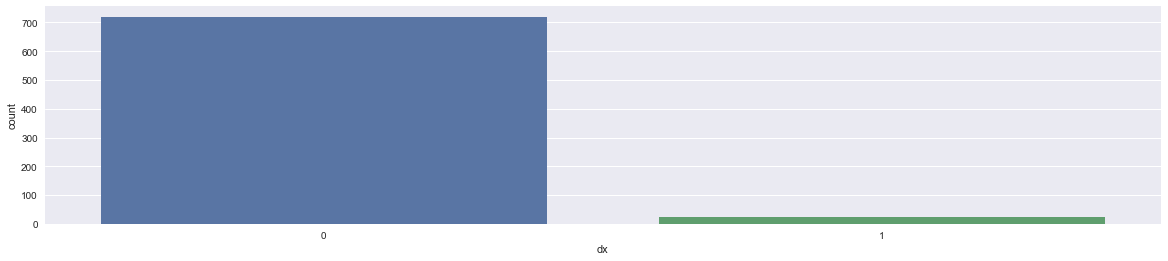

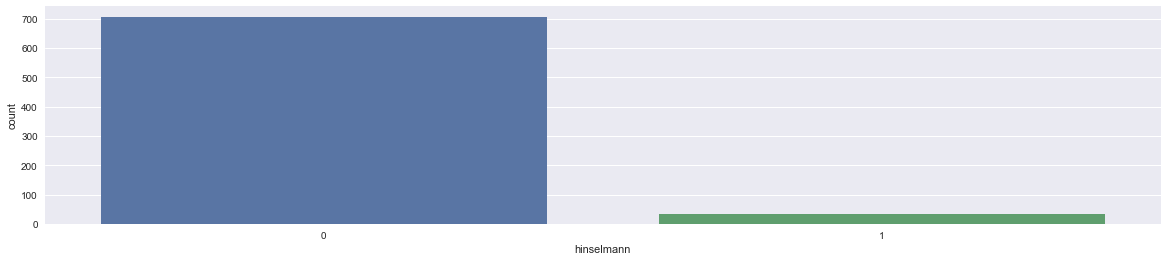

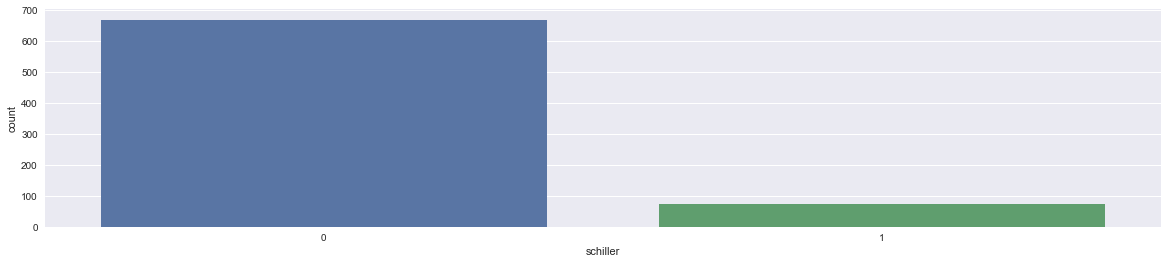

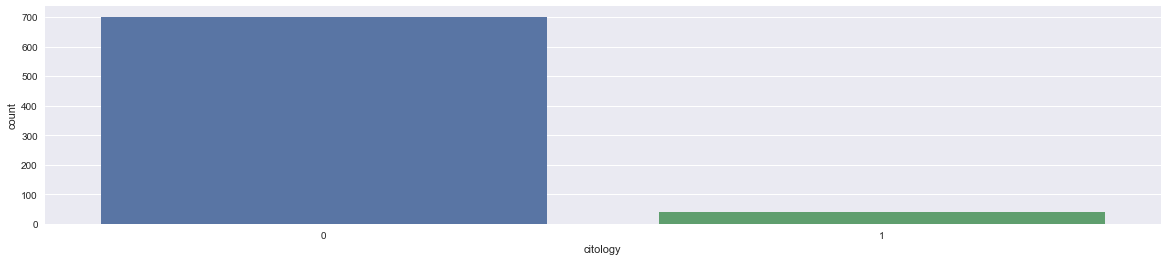

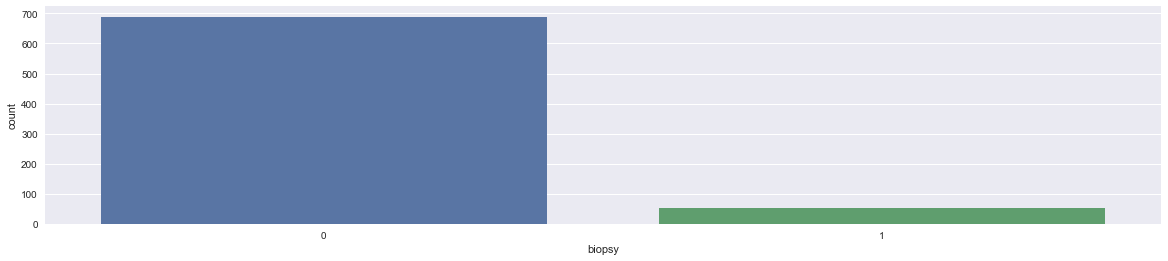

In [415]:
plot_cols = df.columns


for col in plot_cols:
    plt.subplots(figsize=(20,4))
    sns.countplot(x=col, data=df)

## 3. Model!

In [416]:
X = df.drop(['hinselmann', 'schiller', 'citology', 'biopsy'], axis=1)
Y = df['biopsy']

In [601]:
Y.value_counts(normalize=True) 

#Null accruacy is 92.8% (if scored everyone a 0)
#if scored everyone a 0, Recall would be 0 (the most false negatives possible)
#want to Recall to be 1 (Recall 1 would mean no false negatives)

0    0.928571
1    0.071429
Name: biopsy, dtype: float64

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                   test_size = 0.2)

1.Logistic Regression

In [627]:
#Logistic Regression Model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, Y, 
                                                   test_size = 0.2)
log = linear_model.LogisticRegression(class_weight='balanced')
log.fit(X_train_scaled, y_train_scaled)
preds = log.predict(X_test_scaled)
preds_proba = log.predict_proba(X_test_scaled)


print 'Null accuracy of testing:', y_test_scaled.value_counts(normalize=True)
print 'test model accuracy score:', log.score(X_test_scaled,y_test_scaled)
print 'test precision_score:', precision_score(y_test_scaled, preds)
print 'test recall score:', recall_score(y_test_scaled, preds)
print 'test roc score:', roc_auc_score(y_test_scaled, preds)
print 'cross validation recall score:', cross_val_score(log, X_scaled, Y, cv = 5, scoring = 'recall').mean()
print 'cross validation roc score:', cross_val_score(log, X_scaled, Y, cv = 5, scoring = 'roc_auc').mean()

Null accuracy of testing: 0    0.919463
1    0.080537
Name: biopsy, dtype: float64
test model accuracy score: 0.8053691275167785
test precision_score: 0.13043478260869565
test recall score: 0.25
test roc score: 0.552007299270073
cross validation recall score: 0.4763636363636364
cross validation roc score: 0.5740587884558053


In [626]:
preds = binarize(preds_proba, 0.3)[:,1]

In [518]:
#interpret the coefficients 
coef = pd.DataFrame(zip(X.columns, np.transpose(log.coef_[0])), columns = ['coef', 'value'])
coef['odds_ratio'] = np.e**(coef['value'])
coef.sort_values('odds_ratio', ascending=False).head()

,coef,value,odds_ratio
8,hormonal_contraceptive_years,0.407778,1.503473
18,std_hiv,0.382244,1.465570
4,smokes,0.370637,1.448657
24,dx_hpv,0.347419,1.415409
21,std_num_diagnosis,0.334982,1.397915


In [519]:
cm = confusion_matrix(y_test_scaled,preds)
pd.crosstab(y_test_scaled,preds)
#true negative is 268
#true positive is 2
#false negative is 23
#false positive is 4

col_0,0.0,1.0
biopsy,,
0,37,99
1,8,5


In [507]:
#Eliminate False Negative (incorrect negative prediction)
#False Positive is alright (just test again )
print 'TPR:', cm[1,1]/float(cm.sum(axis=1)[1])
print 'TNR:', cm[0,0]/float(cm.sum(axis=1)[0])
print 'FNR:', cm[1,0]/float(cm.sum(axis=1)[1]) #THIS IS HIGH. Inverse of recall
print 'FPR:', cm[0,1]/float(cm.sum(axis=1)[0])

TPR: 0.15384615384615385
TNR: 0.9264705882352942
FNR: 0.8461538461538461
FPR: 0.07352941176470588


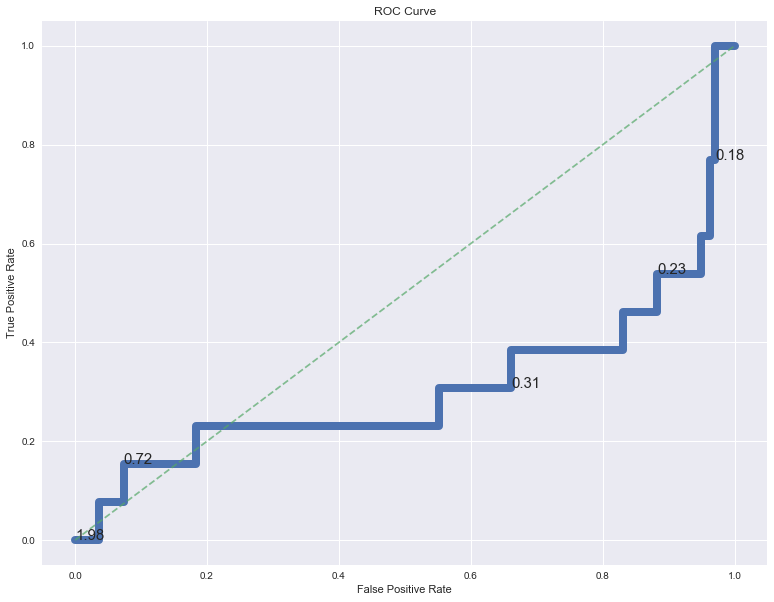

Train Test ROC: 0.30712669683257915
Cross Val ROC: 0.5740587884558053


In [488]:
test_probs = log.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thres = roc_curve(y_test_scaled, test_probs)

plt.figure(figsize=(13,10))
plt.plot(fpr, tpr, linewidth=8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
for label, x, y in zip(thres[::5], fpr[::5], tpr[::5]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y ), size = 15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print 'Train Test ROC:', roc_auc_score(y_test_scaled, test_probs)
print 'Cross Val ROC:', cross_val_score(log, X_scaled, Y,cv = 5, scoring='roc_auc').mean()

2.Decision Tree 

In [631]:
depth_range = range(1,21)

param_grid_dt = {'criterion': ['gini', 'entropy'],
                 'max_depth': depth_range,
                 'min_samples_split' : [2, 10, 20],
                 'class_weight' : ['balanced'],
                 'max_features' : [1,5,10,15,20]}

grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                      param_grid = param_grid_dt, cv=5,
                      scoring = 'recall')

grid_dt.fit(X_train, y_train) #DO THIS ON THE ENTIRE DATA SET 
print grid_dt.best_params_
print grid_dt.best_score_

{'max_features': 1, 'min_samples_split': 20, 'criterion': 'entropy', 'max_depth': 1, 'class_weight': 'balanced'}
0.576353756792


In [632]:
dt = DecisionTreeClassifier(**grid_dt.best_params_)
dt.fit(X_train,y_train)
preds_dt = dt.predict(X_test)

print 'Null accuracy of testing:', y_test.value_counts(normalize=True)
print 'test model score:', dt.score(X_test,y_test)

print 'test precision_score:', precision_score(y_test,preds_dt)
print 'test recall_score:', recall_score(y_test,preds_dt)
print 'test roc score:', roc_auc_score(y_test,preds_dt)

print 'cross validation recall score:', cross_val_score(dt, X, Y, cv=5, scoring='recall').mean()
print 'cross validation roc score:', cross_val_score(dt, X, Y, cv = 5, scoring='roc_auc').mean()

cols = pd.DataFrame(list(zip(X.columns, dt.feature_importances_)),
                    columns = ['features', 'importance'])

cols.sort_values('importance', ascending=False).head()

Null accuracy of testing: 0    0.939597
1    0.060403
Name: biopsy, dtype: float64
test model score: 0.18120805369127516
test precision_score: 0.06201550387596899
test recall_score: 0.8888888888888888
test roc score: 0.5123015873015873
cross validation recall score: 0.5036363636363637
cross validation roc score: 0.5244531317619227


,features,importance
2,first_sexual_intercourse,1.0
0,age,0.0
14,std_syphilis,0.0
24,dx_hpv,0.0
23,dx_cin,0.0


In [552]:
cm = confusion_matrix(y_test,preds_dt)
pd.crosstab(y_test,preds_dt)

col_0,0,1
biopsy,,
0,104,36
1,3,6


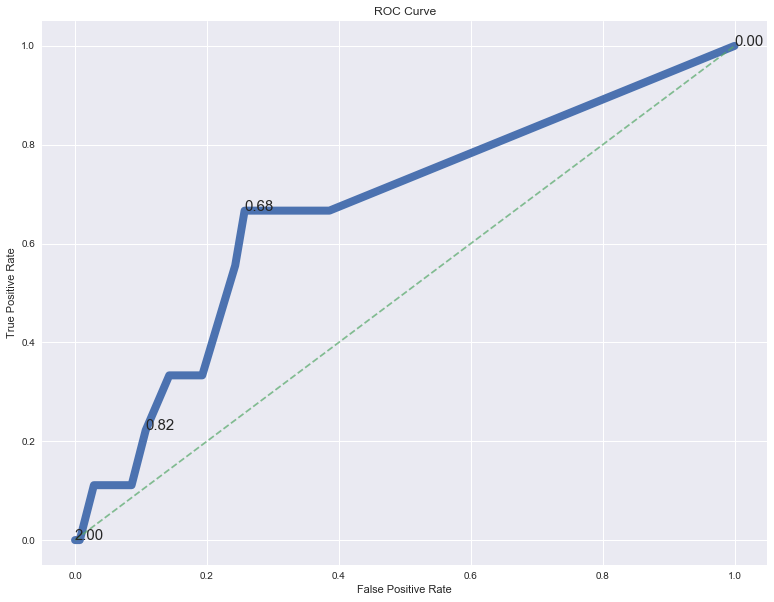

Train Set ROC: 0.6662698412698412
Cross Val ROC: 0.559596664839445


In [553]:
dt_test_probs = dt.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, dt_test_probs)

plt.figure(figsize=(13,10))
plt.plot(fpr, tpr, linewidth=8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
for label, x, y in zip(thres[::5], fpr[::5], tpr[::5]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y ), size = 15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print 'Train Set ROC:', roc_auc_score(y_test, dt_test_probs)
print 'Cross Val ROC:', cross_val_score(dt, X, Y, cv = 5, scoring='roc_auc').mean()

In [428]:
# #find the best max depth

# depth = range(1,21)
# cv_scores = []

# for i in depth:
#     dt_cv = cross_val_score(DecisionTreeClassifier(max_depth=i), X, Y, cv=5, scoring='accuracy').mean()
#     cv_scores.append(dt_cv)

# print sorted(zip(cv_scores, depth), reverse=True)

# plt.figure(figsize=(10,5))
# plt.plot(depth, cv_scores, linewidth=5)
# plt.show()

In [429]:
# #Validation Curve
# train_scores, test_scores = validation_curve(DecisionTreeClassifier(),
#                                             X_test, y_test, param_name = 'max_depth', 
#                                             param_range = depth,
#                                             cv = 5, scoring = 'accuracy')
# train_mean = np.mean(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)

# plt.figure(figsize=(10,5))
# plt.plot(depth, train_mean, label='Training Score', color='blue')
# plt.plot(depth, test_mean, label ='Testing Score', color='green')


# plt.title('Validation Curve')
# plt.xlabel('Depth Value')
# plt.ylabel('Accuracy Score')
# plt.legend()
# plt.show()

3.Random Forest

In [430]:
#Random Forest Grid Search

rfe_estimator_range = range(1,20, 1)
rfe_max_depth = range(1,25,2)

param_grid_rfe = {'n_estimators': rfe_estimator_range,
                 'max_depth' : rfe_max_depth,
                 'max_features' : [1,5,10,15,20],
                 'criterion': ['gini', 'entropy']}

grid_rfe = RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter = 20,
                      param_distributions = param_grid_rfe, cv=5, scoring = 'recall')

grid_rfe.fit(X_train, y_train)
print grid_rfe.best_params_
print grid_rfe.best_score_

{'n_estimators': 5, 'max_features': 5, 'criterion': 'gini', 'max_depth': 15}
0.111485853476


In [555]:
rfe = RandomForestClassifier(**grid_rfe.best_params_)
rfe.fit(X_train,y_train)
preds_rfe = rfe.predict(X_test)

print 'Null accuracy of testing:', y_test.value_counts(normalize=True)
print 'model_score:', rfe.score(X_test,y_test)

print 'precision_score:', precision_score(y_test,preds_rfe)
print 'recall_score:', recall_score(y_test,preds_rfe)
print 'roc score:', roc_auc_score(y_test,preds_rfe)

print 'cross validation recall score:', cross_val_score(rfe, X, Y, cv=5, scoring='recall').mean()
print 'cross validation roc score:', cross_val_score(rfe, X, Y, cv=5, scoring='roc_auc').mean()

pd.DataFrame({'feature':X.columns, 
              'importance':rfe.feature_importances_}).sort_values('importance', ascending = False).head(10)


Null accuracy of testing: 0    0.939597
1    0.060403
Name: biopsy, dtype: float64
model_score: 0.9261744966442953
precision_score: 0.0
recall_score: 0.0
roc score: 0.4928571428571429
cross validation recall score: 0.05818181818181818
cross validation roc score: 0.5402054181933585


,feature,importance
0,age,0.192292
2,first_sexual_intercourse,0.138541
3,num_pregnancies,0.119315
8,hormonal_contraceptive_years,0.102250
1,sexual_partners,0.099168
6,smoke_packs_per_year,0.059491
10,iud_years,0.056458
25,dx,0.037993
23,dx_cin,0.036368
18,std_hiv,0.031373


In [556]:
#confusion matrix
cm = confusion_matrix(y_test,preds_rfe)
pd.crosstab(y_test,preds_rfe)

col_0,0,1
biopsy,,
0,138,2
1,9,0


In [ ]:
y_pred = np.where(probs>= .3, 1, 0)

accuracy_score(y_test, y_pred)

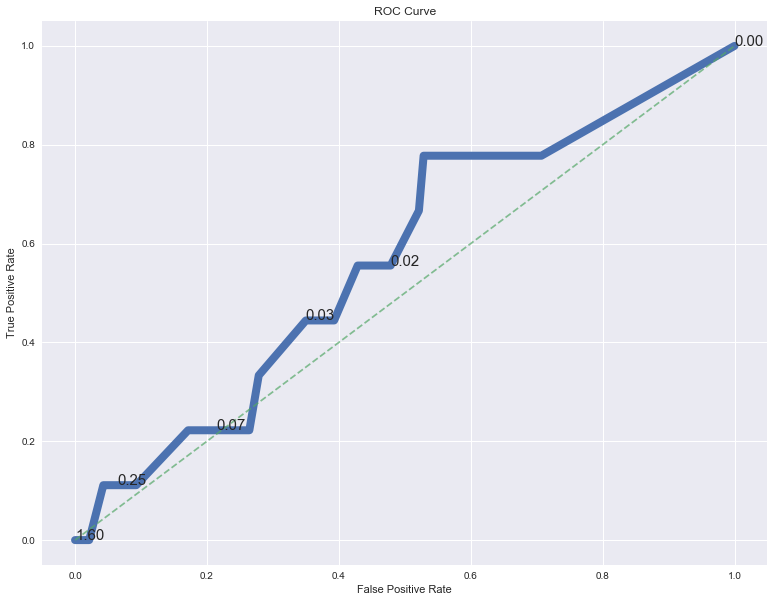

Train Set ROC: 0.5674603174603174
Cross Val ROC: 0.5344611138359155


In [557]:
#roc curve
rfe_test_probs = rfe.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, rfe_test_probs)

plt.figure(figsize=(13,10))
plt.plot(fpr, tpr, linewidth=8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
for label, x, y in zip(thres[::5], fpr[::5], tpr[::5]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y ), size = 15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print 'Train Set ROC:', roc_auc_score(y_test, rfe_test_probs)
print 'Cross Val ROC:', cross_val_score(dt, X, Y, cv = 5, scoring='roc_auc').mean()

In [434]:
# #tune estimators - number of trees. max is the number of rows
# estimator_range = range(10,800,40)

# rfe_cv_scores_estimator = []

# for estimator in estimator_range:
#     rfe_cv_e = cross_val_score(RandomForestClassifier(n_estimators=estimator), X, Y, cv=5, scoring='accuracy').mean()
#     rfe_cv_scores_estimator.append(rfe_cv_e)

# #print sorted(zip(estimator_range, rfe_cv_scores_estimator),key=lambda x: x[1],reverse=True)[0]
# print sorted(zip(rfe_cv_scores_estimator, estimator_range), reverse=True)

# plt.figure(figsize=(10,5))
# plt.plot(estimator_range, rfe_cv_scores_estimator, linewidth=5)
# plt.show()

# #tune max depth

# depth = range(1,40)
# rfe_cv_scores_depth = []

# for i in depth:
#     rfe_cv_d = cross_val_score(RandomForestClassifier(max_depth=i), X, Y, cv=5, scoring='accuracy').mean()
#     rfe_cv_scores_depth.append(rfe_cv_d)

# #print sorted(zip(depth, rfe_cv_scores_depth))[0]
# print sorted(zip(rfe_cv_scores_depth, depth), reverse=True)

# plt.figure(figsize=(10,5))
# plt.plot(depth, rfe_cv_scores_depth, linewidth=5)
# plt.show()

# #tune max features
# feature_range = range(1, len(X.columns) + 1)
# rfe_cv_scores_range = []

# print feature_range

# for features in feature_range:
#     rfe_cv_r = cross_val_score(RandomForestClassifier(max_features=features, max_depth=6, n_estimators=770), X, Y, cv=5, scoring='accuracy').mean()
#     rfe_cv_scores_range.append(rfe_cv_r)

# #print sorted(zip(feature_range, rfe_cv_scores_range))[0]
# print sorted(zip(rfe_cv_scores_range, feature_range), reverse=True)

# plt.figure(figsize=(10,5))
# plt.plot(feature_range, rfe_cv_scores_range, linewidth=5)
# plt.show()


4.Adaboost

In [435]:
#Ada Boost Grid Search

ada_estimator_range = range(1,20, 1)

param_grid_ada = {'n_estimators': rfe_estimator_range}

grid_ada = GridSearchCV(estimator=AdaBoostClassifier(),
                      param_grid = param_grid_ada, cv=5, scoring = 'recall')

grid_ada.fit(X_train, y_train)
print grid_ada.best_params_
print grid_ada.best_score_

{'n_estimators': 14}
0.0445943413903


In [436]:
ada.predict_proba(X_test)

array([[0.54216849, 0.45783151],
       [0.59491141, 0.40508859],
       [0.55810432, 0.44189568],
       [0.56854663, 0.43145337],
       [0.5547948 , 0.4452052 ],
       [0.55386669, 0.44613331],
       [0.55810432, 0.44189568],
       [0.55386669, 0.44613331],
       [0.56816264, 0.43183736],
       [0.5547948 , 0.4452052 ],
       [0.52424755, 0.47575245],
       [0.54549498, 0.45450502],
       [0.55386669, 0.44613331],
       [0.55386669, 0.44613331],
       [0.5547948 , 0.4452052 ],
       [0.52575619, 0.47424381],
       [0.60599672, 0.39400328],
       [0.54216849, 0.45783151],
       [0.57984387, 0.42015613],
       [0.54191482, 0.45808518],
       [0.51931923, 0.48068077],
       [0.5559982 , 0.4440018 ],
       [0.54335445, 0.45664555],
       [0.55111717, 0.44888283],
       [0.53575759, 0.46424241],
       [0.56854663, 0.43145337],
       [0.55692543, 0.44307457],
       [0.9430591 , 0.0569409 ],
       [0.55810432, 0.44189568],
       [0.55810432, 0.44189568],
       [0.

In [558]:
ada = AdaBoostClassifier(**grid_ada.best_params_)
ada.fit(X_train,y_train)
#preds_ada = ada.predict(X_test)
preds_ada = binarize(ada.predict_proba(X_test), 0.44)[:,1]

print 'Null accuracy of testing:', y_test.value_counts(normalize=True)
print 'test model_score:', ada.score(X_test,y_test)

print 'test precision_score:', precision_score(y_test,preds_ada)
print 'test recall_score:', recall_score(y_test,preds_ada)
print 'test roc score:', roc_auc_score(y_test,preds_ada)

print 'cross validation recall score:', cross_val_score(ada, X, Y, cv=5, scoring='recall').mean()
print 'cross validation roc score:', cross_val_score(ada, X, Y, cv=5, scoring='roc_auc').mean()


Null accuracy of testing: 0    0.939597
1    0.060403
Name: biopsy, dtype: float64
test model_score: 0.9328859060402684
test precision_score: 0.07216494845360824
test recall_score: 0.7777777777777778
test roc score: 0.5674603174603174
cross validation recall score: 0.01818181818181818
cross validation roc score: 0.6259623207639711


In [438]:
# estimators = range(1, 11, 1)
# estimators

# cv_scores=[]

# for est in estimators:
#     ada = AdaBoostClassifier(n_estimators = est)
#     score = cross_val_score(ada, X, Y, cv=5, scoring = 'accuracy').mean()
#     cv_scores.append(score)

# plt.figure(figsize= (8, 7))
# plt.plot(estimators, cv_scores, linewidth = 3)
# plt.xlabel("N Estimators")
# plt.ylabel("Cross Validated Accuracy Scores");

# sorted(zip(cv_scores, estimators), reverse=True)

In [439]:
#confusion matrix
cm = confusion_matrix(y_test,preds_ada)
pd.crosstab(y_test,preds_ada)

col_0,0.0,1.0
biopsy,,
0,50,90
1,2,7


In [634]:
ada.predict_proba(X_test)

array([[0.55215381, 0.44784619],
       [0.59673396, 0.40326604],
       [0.55215381, 0.44784619],
       [0.56457081, 0.43542919],
       [0.55215381, 0.44784619],
       [0.55215381, 0.44784619],
       [0.55215381, 0.44784619],
       [0.55385932, 0.44614068],
       [0.53087564, 0.46912436],
       [0.55215381, 0.44784619],
       [0.52881696, 0.47118304],
       [0.55215381, 0.44784619],
       [0.56457081, 0.43542919],
       [0.56457081, 0.43542919],
       [0.55215381, 0.44784619],
       [0.53297129, 0.46702871],
       [0.57320533, 0.42679467],
       [0.55215381, 0.44784619],
       [0.55215381, 0.44784619],
       [0.53493876, 0.46506124],
       [0.50952279, 0.49047721],
       [0.55215381, 0.44784619],
       [0.54138499, 0.45861501],
       [0.54548234, 0.45451766],
       [0.52881696, 0.47118304],
       [0.56457081, 0.43542919],
       [0.55215381, 0.44784619],
       [0.94200541, 0.05799459],
       [0.54138499, 0.45861501],
       [0.55215381, 0.44784619],
       [0.

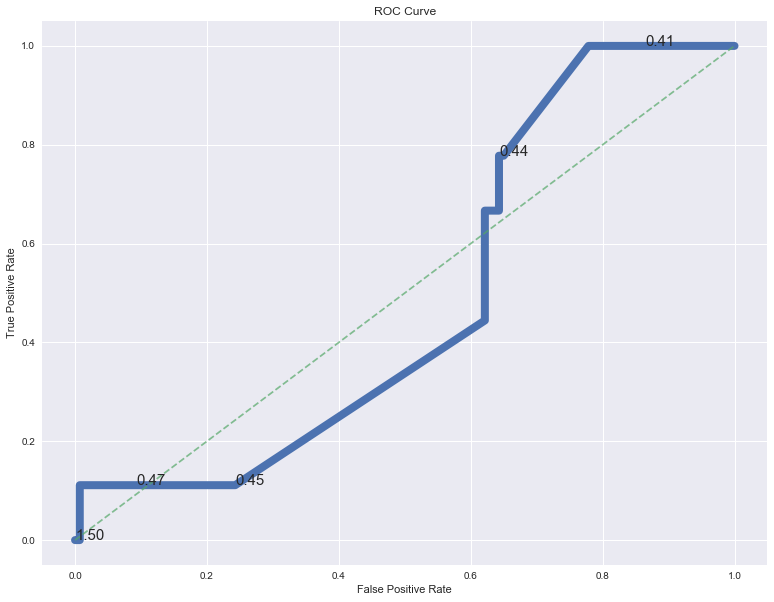

Train Set ROC: 0.48690476190476184
Cross Val ROC: 0.6264034505640345


In [440]:
#roc curve
ada_test_probs = ada.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, ada_test_probs)

plt.figure(figsize=(13,10))
plt.plot(fpr, tpr, linewidth=8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
for label, x, y in zip(thres[::5], fpr[::5], tpr[::5]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y ), size = 15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print 'Train Set ROC:', roc_auc_score(y_test, ada_test_probs)
print 'Cross Val ROC:', cross_val_score(ada, X, Y, cv = 5, scoring='roc_auc').mean()

5.K Neighbors

In [521]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)
knn.score(X_test, y_test)

0.9261744966442953

In [586]:
cm = confusion_matrix(y_test, preds_knn)
cm

array([[138,   2],
       [  9,   0]])

6.Down Sampling

In [590]:
from sklearn.utils import resample

N = df['biopsy'].value_counts()[1]

cancer_maj = df[df['biopsy'] ==0]
cancer_min = df[df['biopsy'] ==1]

#Downsample the majority class
cancer_majority_downsample = resample(cancer_maj, replace=False,
                                     n_samples = N)

cancer_ds = pd.concat([cancer_majority_downsample, cancer_min])

cancer_ds['biopsy'].value_counts() #should be 53 in each

1    53
0    53
Name: biopsy, dtype: int64

In [591]:
X_ds = cancer_ds.drop(['hinselmann', 'schiller', 'citology', 'biopsy'], axis=1)
Y_ds = cancer_ds['biopsy']

In [592]:
print 'accuracy:', cross_val_score(linear_model.LogisticRegression(), X_ds, Y_ds, cv = 5, scoring="accuracy").mean()
print 'precison:', cross_val_score(linear_model.LogisticRegression(), X_ds, Y_ds, cv = 5, scoring="precision").mean()
print 'recall:', cross_val_score(linear_model.LogisticRegression(), X_ds, Y_ds, cv = 5, scoring="recall").mean()
print 'roc_auc:', cross_val_score(linear_model.LogisticRegression(), X_ds, Y_ds, cv = 5, scoring="roc_auc").mean()

accuracy: 0.6236363636363638
precison: 0.6533333333333333
recall: 0.5327272727272727
roc_auc: 0.5861487603305785


In [602]:
#train on downsample data and apply to imbalanced dataset
train = X_train.copy()
train['Biopsy'] = y_train

In [603]:
train['Biopsy'].value_counts()

0    549
1     44
Name: Biopsy, dtype: int64

In [610]:
N = train['Biopsy'].value_counts()[1]

cancer_maj = train[train['Biopsy'] ==0]
cancer_min = train[train['Biopsy'] ==1]

cancer_majority_downsampled = resample(cancer_maj, replace = False,
                                      n_samples=N)

cancer_ds = pd.concat([cancer_majority_downsampled, cancer_min])

cancer_ds['Biopsy'].value_counts()

1    44
0    44
Name: Biopsy, dtype: int64

In [613]:
cancer_ds_X = cancer_ds.drop('Biopsy', axis = 1)
cancer_ds_y = cancer_ds['Biopsy']
up_log = linear_model.LogisticRegression()
up_log.fit(cancer_ds_X, cancer_ds_y) #train model on the downsampled training data set

y_test.value_counts(normalize=True)
up_preds = up_log.predict(X_test) #test model on the original training set 

print 'accuracy:', accuracy_score(y_test, up_preds)
print 'precision:',precision_score(y_test, up_preds)
print 'recall:', recall_score(y_test, up_preds)
print 'ROC:', roc_auc_score(y_test, up_preds)

print 'Cross Val ROC:', cross_val_score(up_log, cancer_ds_X, cancer_ds_y,cv = 5, scoring='roc_auc').mean()

accuracy: 0.6845637583892618
precision: 0.08695652173913043
recall: 0.4444444444444444
ROC: 0.5722222222222222
Cross Val ROC: 0.6506172839506174


In [614]:
confusion_matrix(y_test,up_preds)

array([[98, 42],
       [ 5,  4]])

7.TRY UPSAMPLING

In [618]:
#assign number of training dataset to variable 
N = Y.value_counts()[0]

cancer_maj = df[df['biopsy'] ==0]
cancer_min = df[df['biopsy'] ==1]

#Downsample the majority cl"ass
cancer_minority_upsampled = resample(cancer_min, replace=True,
                                     n_samples = N)

#combine majority with the minority
cancer_ds = pd.concat([cancer_minority_upsampled, cancer_maj])

cancer_ds['biopsy'].value_counts()

1    689
0    689
Name: biopsy, dtype: int64

In [619]:
up_X_ds = cancer_ds.drop(['hinselmann', 'schiller', 'citology', 'biopsy'], axis=1)
up_Y_ds = cancer_ds['biopsy']
log = linear_model.LogisticRegression()
log.fit(up_X_ds, up_Y_ds)

y_test.value_counts(normalize=True)
preds = log.predict(X_test)

print 'accuracy:', accuracy_score(y_test, preds)
print 'precision:',precision_score(y_test, preds)
print 'recall:', recall_score(y_test, preds)
print 'ROC:', roc_auc_score(y_test, preds)

print 'Cross Val ROC:', cross_val_score(up_log, up_X_ds, up_Y_ds,cv = 5, scoring='roc_auc').mean()

confusion_matrix(y_test,preds)

accuracy: 0.7986577181208053
precision: 0.16129032258064516
recall: 0.5555555555555556
ROC: 0.6849206349206349
Cross Val ROC: 0.7033172193813846


array([[114,  26],
       [  4,   5]])